<a href="https://colab.research.google.com/github/pratyaksh12/Machine-learning-10---Kmeans-clusters-/blob/main/Clusturing(_k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
files.upload()


Saving petals_sepals.csv to petals_sepals (1).csv


{'petals_sepals (1).csv': b'petal_size,sepal_size\r\n11.323483685563534,13.866161314601005\r\n9.265841608434716,13.443413601502218\r\n14.32994391517275,7.956199558517603\r\n11.883901977683092,7.658534107521188\r\n9.957722160371432,12.273534875602246\r\n11.874465854197416,13.237838548015896\r\n11.054346640185594,8.346458322120055\r\n9.925010361127422,9.631404839077337\r\n6.723305561775902,12.91052608289124\r\n1.7547027950718903,4.922297552367944\r\n2.5376079205148603,2.3927440864254024\r\n0.8282640892586096,2.570578864513068\r\n14.173080875838036,9.03309241750231\r\n2.8166071010343283,2.2191162318608018\r\n8.615215401521048,12.961167138021588\r\n12.876543346581766,8.387601348446907\r\n14.08781071933008,6.681777438253116\r\n2.590593188232334,2.042033343203456\r\n3.3205727560044287,4.3409777878342215\r\n3.325535329705019,2.207371032078435\r\n10.017734290920627,9.495276240319582\r\n9.20235231794508,13.789553601325125\r\n10.474434575888745,13.037909825595824\r\n11.454578956277908,8.76001506

In [42]:

import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd

df  = pd.read_csv('petals_sepals.csv')
df.head()

fig = px.scatter(df, x = 'petal_size', y ='sepal_size' )
fig.show()

In [49]:
X = df.values

In [50]:
print(X)

[[11.32348369 13.86616131]
 [ 9.26584161 13.4434136 ]
 [14.32994392  7.95619956]
 [11.88390198  7.65853411]
 [ 9.95772216 12.27353488]
 [11.87446585 13.23783855]
 [11.05434664  8.34645832]
 [ 9.92501036  9.63140484]
 [ 6.72330556 12.91052608]
 [ 1.7547028   4.92229755]
 [ 2.53760792  2.39274409]
 [ 0.82826409  2.57057886]
 [14.17308088  9.03309242]
 [ 2.8166071   2.21911623]
 [ 8.6152154  12.96116714]
 [12.87654335  8.38760135]
 [14.08781072  6.68177744]
 [ 2.59059319  2.04203334]
 [ 3.32057276  4.34097779]
 [ 3.32553533  2.20737103]
 [10.01773429  9.49527624]
 [ 9.20235232 13.7895536 ]
 [10.47443458 13.03790983]
 [11.45457896  8.76001507]
 [11.03565171  9.70704578]
 [13.46897961  8.43272357]
 [14.40798387  8.68145304]
 [11.49414942 12.35569869]
 [11.88685783  8.13176978]
 [ 8.54247125 13.30436616]
 [13.86822339  9.45088543]
 [10.49468563 12.56398709]
 [10.16523291 13.23462868]
 [12.32039217  9.30666119]
 [ 0.958256    4.44098269]
 [ 9.26893891 13.97415349]
 [ 0.61360663  2.76290393]
 

In [64]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters  = i, init = 'k-means++', n_init =  'auto')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)



<Axes: >

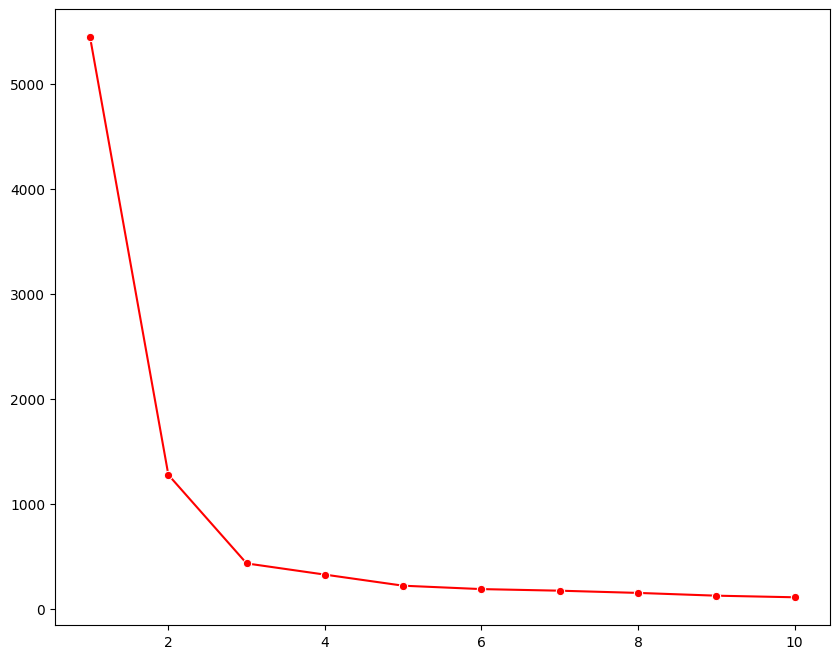

In [71]:
# elbow method

import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.lineplot(x = range(1,11), y = wcss,marker = 'o',color = 'red')

In [72]:
kmeans  = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto')
y_kmeans = kmeans.fit_predict(X)

<Axes: >

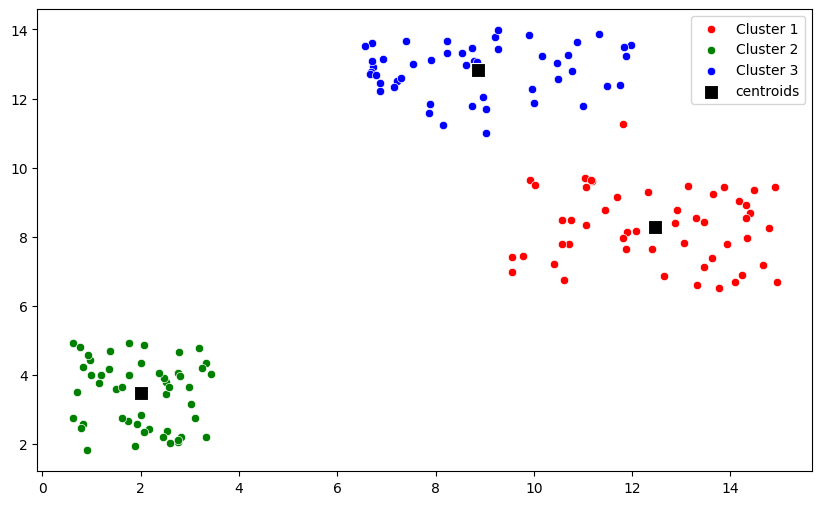

In [89]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = X[y_kmeans == 0,0], y = X[y_kmeans == 0,1], color = 'red', label = 'Cluster 1')
sns.scatterplot(x = X[y_kmeans == 1,0], y = X[y_kmeans == 1,1], color = 'green', label = 'Cluster 2')
sns.scatterplot(x = X[y_kmeans == 2,0], y = X[y_kmeans == 2,1], color = 'blue', label = 'Cluster 3')
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], label = 'centroids', marker = ',', s = 100, color = 'black')

In [95]:
petal_size = float(input('enter peatl size of flower: '))
sepal_size = float(input('enter sepal size of flower: '))

user_input = [petal_size, sepal_size]
user_input = np.array(user_input).reshape(1,-1)

result = kmeans.predict(user_input)
print(f'the flower wil fall in category {result[0] + 1} -----  pls check the above diagram for result :)')

enter peatl size of flower: 10.33
enter sepal size of flower: 9.77
the flower wil fall in category 1 -----  pls check the above diagram for result :)
